## Importing Important libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random
import os
from google.colab import files

## Uploading Data

Contains 2307 images for each gender

In [50]:
from google.colab import drive
drive.mount('/content/drive')
image_directory = '/content/drive/MyDrive/Test_5'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Preprocessing the data

In [51]:


# Set the desired image resize dimensions
image_size = (92, 92)

# Initialize empty lists for images and labels
image_array = []
label_array = []

# Define the folder names for the classes
classes = ['Male', 'Female']

# Loop through the 'Male' and 'Female' subfolders to process images
for label, class_name in enumerate(classes):
    class_folder = os.path.join(image_directory, class_name)

    # Loop through all images in the class folder
    for image_name in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_name)

        # Check if the file is an image (you can add more extensions if needed)
        if image_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            # Read the image using OpenCV (cv2)
            img = cv2.imread(image_path)

            if img is not None:
                # Convert the image from BGR to RGB (since OpenCV loads in BGR)
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                # Resize the image
                img_resized = cv2.resize(img_rgb, image_size)

                # Append the resized image to the image array
                image_array.append(img_resized)

                # Append the label (0 for male, 1 for female) to the label array
                label_array.append(label)

# Shuffle the dataset (images and labels) together
# Combine images and labels into a single list of tuples
data = list(zip(image_array, label_array))

# Shuffle the data (images and labels) together
random.shuffle(data)

# Unzip the shuffled data back into separate lists
image_array, label_array = zip(*data)

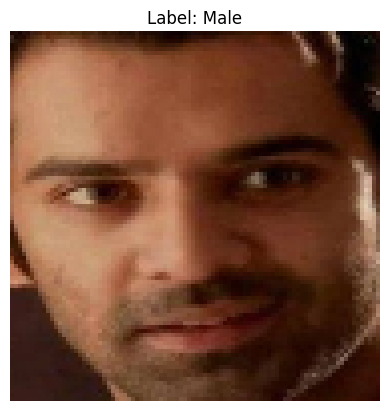

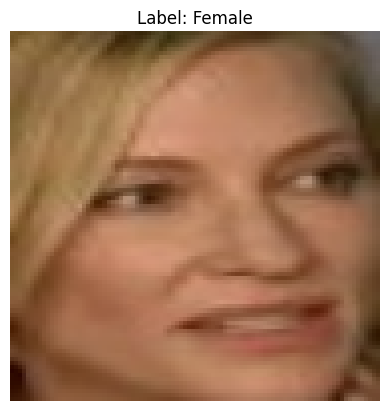

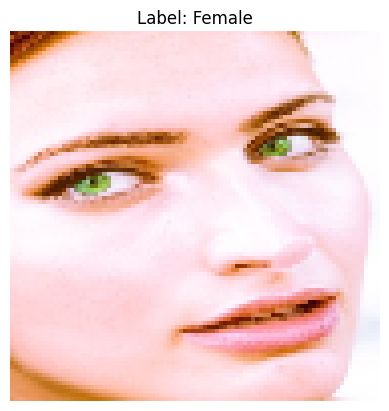

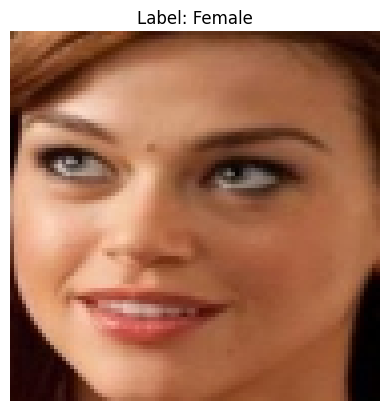

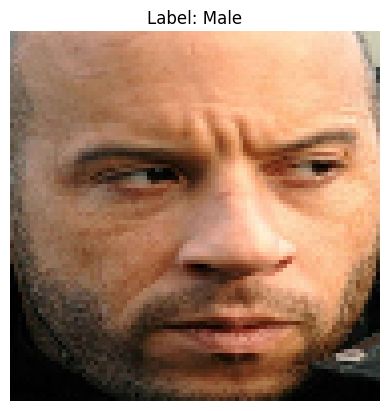

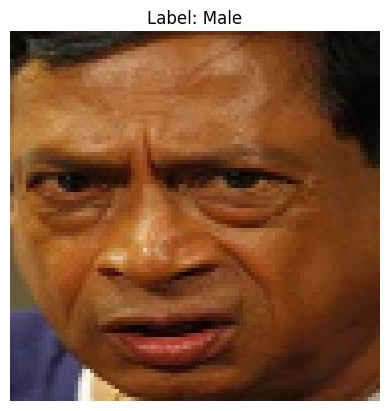

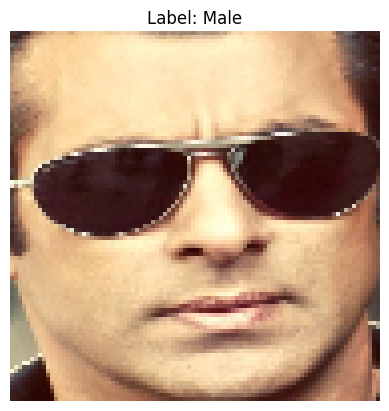

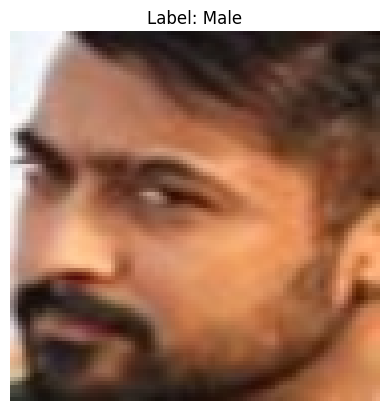

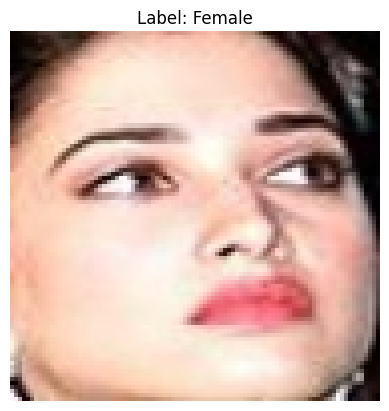

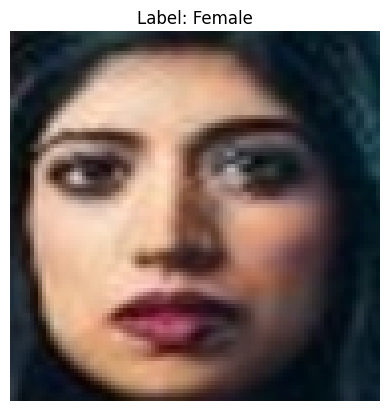

In [52]:
# Plot a few images with their labels
for i in range(10):
    plt.imshow(image_array[i])  # Display the image
    plt.title(f"Label: {'Male' if label_array[i] == 0 else 'Female'}")  # Show the label
    plt.axis('off')
    plt.show()


In [53]:
# Convert the lists to numpy arrays
image_array = np.array(image_array, dtype=float)
label_array = np.array(label_array, dtype=float)

# Print the shapes of the resulting arrays
print(f"Shape of the image array: {image_array.shape}")  # (number_of_images, height, width, channels)
print(f"Shape of the label array: {label_array.shape}")

Shape of the image array: (2307, 92, 92, 3)
Shape of the label array: (2307,)


In [54]:
image_array[:5]

array([[[[ 28.,   9.,   3.],
         [ 30.,  12.,   9.],
         [ 23.,   3.,   1.],
         ...,
         [ 16.,   6.,   2.],
         [ 21.,   4.,   1.],
         [ 38.,  15.,  12.]],

        [[ 58.,  39.,  32.],
         [ 28.,   8.,   3.],
         [ 36.,  11.,   6.],
         ...,
         [ 25.,  22.,  13.],
         [ 19.,   7.,   3.],
         [ 30.,  12.,   8.]],

        [[ 47.,  30.,  20.],
         [ 41.,  22.,  10.],
         [ 42.,  17.,   5.],
         ...,
         [ 12.,  13.,   7.],
         [ 29.,  24.,  18.],
         [ 17.,   4.,   1.]],

        ...,

        [[ 59.,  30.,  24.],
         [ 58.,  29.,  25.],
         [ 58.,  29.,  25.],
         ...,
         [ 53.,  16.,   6.],
         [ 51.,  14.,   6.],
         [ 48.,   8.,   4.]],

        [[ 57.,  27.,  21.],
         [ 58.,  29.,  25.],
         [ 58.,  29.,  25.],
         ...,
         [ 48.,  13.,   4.],
         [ 47.,  12.,   4.],
         [ 45.,   7.,   4.]],

        [[ 58.,  29.,  23.],
       

In [55]:
# Dividing each element by 255 because each pixel has a maximum value of 255.0 so by dividing 255 we will get a number between 0 to 1
image_array = image_array/255.0

In [56]:
# Spliting the data into train and test arrays. This was done manually by me because train_test_split was not splitting the data probably.
# The data was split as 20% for test and 80% for train

trainX = image_array[:1847]
testX = image_array[1847:]

trainY = label_array[:1847]
testY = label_array[1847:]

from tensorflow.keras.utils import to_categorical, plot_model

trainY = to_categorical(trainY, num_classes=2)
testY = to_categorical(testY, num_classes=2)

## Making the model and training it

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Dense, MaxPooling2D, Activation, Flatten, Dropout
from tensorflow.keras import backend as K


model = Sequential()

# First convolutional block
model.add(Conv2D(32, (3, 3), padding="same", input_shape=(94, 94, 3)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second convolutional block
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Third convolutional block
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer
model.add(Dense(2, activation="softmax"))

# The last layer has classes = 2 as we want the answer in binary 0 for male and 1 for female

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 94, 94, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 94, 94, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 94, 94, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 47, 47, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 47, 47, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 47, 47, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 47, 47, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 23, 23, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 23, 23, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,965,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,060,866 (15.49 MB)

 Trainable params: 4,059,906 (15.49 MB)

 Non-trainable params: 960 (3.75 KB)

In [58]:
# Augmented data is produced to increase train data which will inturn increase accuracy

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(trainX)

In [59]:
# Funally training the model. I have used early stopping to stop the training if val_loss is not decreasing or is still to  reduce unnecessary load time

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    trainX, trainY,
    validation_data=(testX, testY),
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping]
)


Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.7563 - loss: 0.7419 - val_accuracy: 0.5087 - val_loss: 1.7826
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 76s 945ms/step - accuracy: 0.8700 - loss: 0.3418 - val_accuracy: 0.5152 - val_loss: 2.1731
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 57s 981ms/step - accuracy: 0.9139 - loss: 0.2129 - val_accuracy: 0.6739 - val_loss: 1.2471
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 82s 998ms/step - accuracy: 0.9394 - loss: 0.1740 - val_accuracy: 0.6304 - val_loss: 1.6140
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 82s 993ms/step - accuracy: 0.9322 - loss: 0.1565 - val_accuracy: 0.8000 - val_loss: 0.5756
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.9385 - loss: 0.1759 - val_accuracy: 0.8000 - val_loss: 0.4902
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.9563 - loss: 0.1151 - val_accuracy: 0.8783 - val_loss: 0.3759
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 79s 963ms/step - accuracy: 0.9517 - loss: 0.1055 - val_accuracy: 0.8

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - accuracy: 0.9413 - loss: 0.1858
Loss =  0.16336528956890106
Accuracy =  94.34782862663269 %


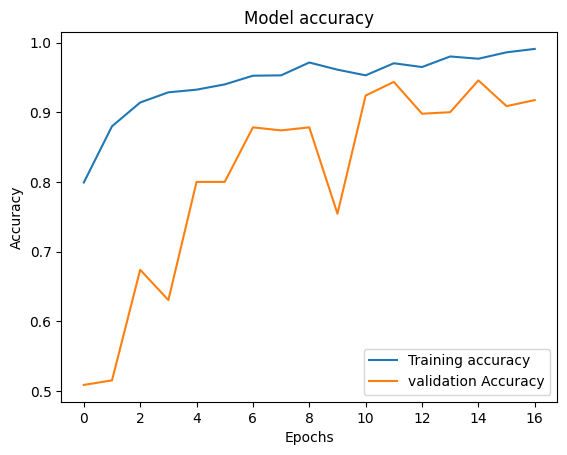

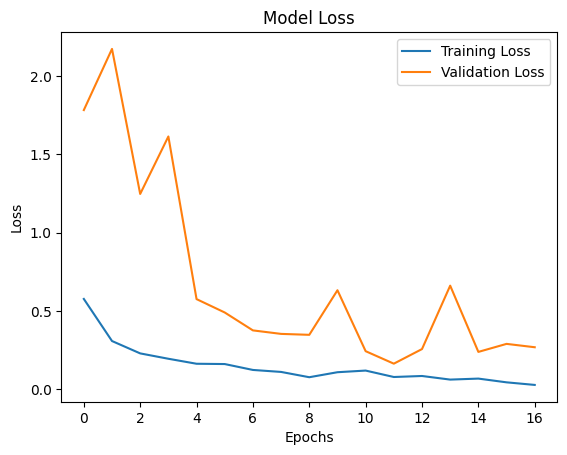

In [60]:
results = model.evaluate(testX,testY)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")

# Plot Accuracy...
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Similarly write code to plot loss...
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [61]:
# Loading Harr Cascaade

from tensorflow.keras.models import load_model

!wget https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


--2024-12-12 11:16:04--  https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml [following]
--2024-12-12 11:16:04--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml.1’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.06s   

20

In [62]:
# Creating a gender detecting function using the model we trained

def predict_gender(image_path, model, face_cascade):
    # Load the image
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Could not load image.")
        return

    # Convert to grayscale for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # If no faces are detected
    if len(faces) == 0:
        print("No faces detected.")
        return

    # Loop through detected faces
    for (x, y, w, h) in faces:
        # Extract face region
        face = img[y:y + h, x:x + w]

        # Resize to match model input size (94x94)
        face_resized = cv2.resize(face, (94, 94))

        # Normalize pixel values to [0, 1]
        face_resized = face_resized.astype("float32") / 255.0

        # Expand dimensions to match the model input shape (1, 94, 94, 3)
        face_resized = np.expand_dims(face_resized, axis=0)

        # Predict gender
        predictions = model.predict(face_resized)
        predicted_gender = np.argmax(predictions)  # 0: Male, 1: Female
        confidence = np.max(predictions)*100

        # Add a label to the image
        label = f"{'Male' if predicted_gender == 0 else 'Female'}: {confidence:.4f}{'%'}"
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(img, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display the image with annotations
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


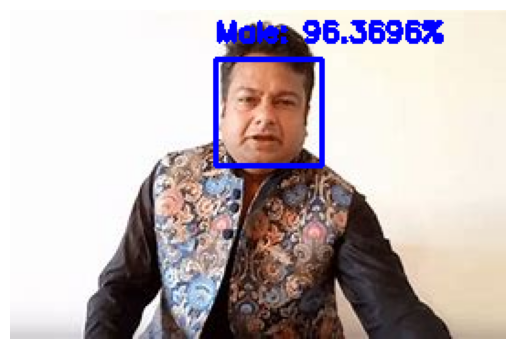

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


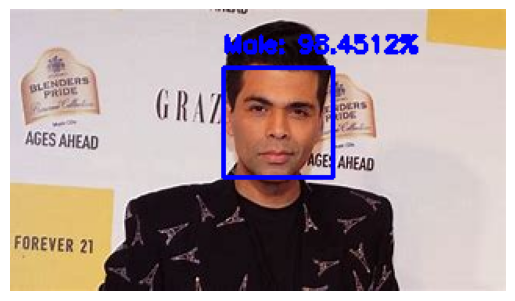

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


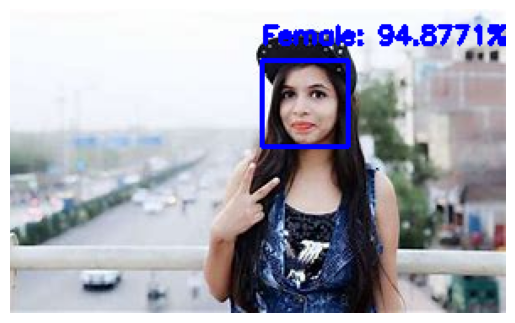

In [63]:
# Define the folder path where the images are stored in Google Drive
folder_path = '/content/drive/MyDrive/Dummy'

# Listing all the files in the folder
image_files = [os.path.join(folder_path, Dummy) for Dummy in os.listdir(folder_path) if Dummy.endswith(('.jpg', '.jpeg', '.png'))]

# Storing image paths in an object (as a list)
image_paths = image_files


# Picking  images from the list using for loop
for i in range(3):
  image_path_1 = image_paths[i]

  predict_gender(image_path_1, model, face_cascade)

In [64]:
# Save the model in .h5 format
model.save('/content/my_trained_model1.h5')

# Download the saved model to your local machine
from google.colab import files
files.download('/content/my_trained_model1.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>